# Intrusion Detection System (IDS)
Βασισμένο στο dataset [pcap_data.csv](https://github.com/kdemertzis/EKPA/blob/main/Data/pcap_data.csv)
και το πρότυπο κώδικα του αρχείου `IDS_example.py`. Τρέχει στο Google Colab.

Initial dataset shape: (14967, 26)
Initial target value counts:
target
1.0    5013
0.0    5002
2.0    4952
Name: count, dtype: int64
After dropping NaN: (14967, 26)
Unique target values: [2. 0. 1.]
Final dataset shape before mapping: (14967, 26)
Final target value counts:
target
1.0    5013
0.0    5002
2.0    4952
Name: count, dtype: int64
Unique labels to map: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
Generated label mapping: {np.float64(0.0): 0, np.float64(1.0): 1, np.float64(2.0): 2}
Number of classes: 3
Target values after mapping: [2 0 1]
Final X shape: (14967, 25)
Final y shape: (14967,)
X_train shape: (11973, 25)
y_train unique values: [0 1 2]
X_val shape: (1497, 25)
y_val unique values: [0 1 2]
y_train_cat shape: (11973, 3)
y_val_cat shape: (1497, 3)
Class weights: {0: np.float64(0.9975006248437891), 1: np.float64(0.9952618453865336), 2: np.float64(1.0073195355880868)}
X_train_conv shape: (11973, 25, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 23, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,611 (18.01 KB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Model output shape for single sample: (1, 3)
Should match y_train_cat shape: (1, 3)
Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3257 - loss: 1.1002 - val_accuracy: 0.3300 - val_loss: 1.0980
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.0975 - val_accuracy: 0.3888 - val_loss: 1.0968
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3618 - loss: 1.0967 - val_accuracy: 0.3407 - val_loss: 1.0956
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3693 - loss: 1.0951 - val_accuracy: 0.3848 - val_loss: 1.0939
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3691 - loss: 1.0941 - val_accuracy: 0.3841 - val_loss: 1.0922
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3652 - loss: 1.0921 - val_accuracy: 0.3801 - val_loss: 1.0900
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3817 - loss: 1.0908 - val_accuracy: 0.3881 - val_loss: 1.

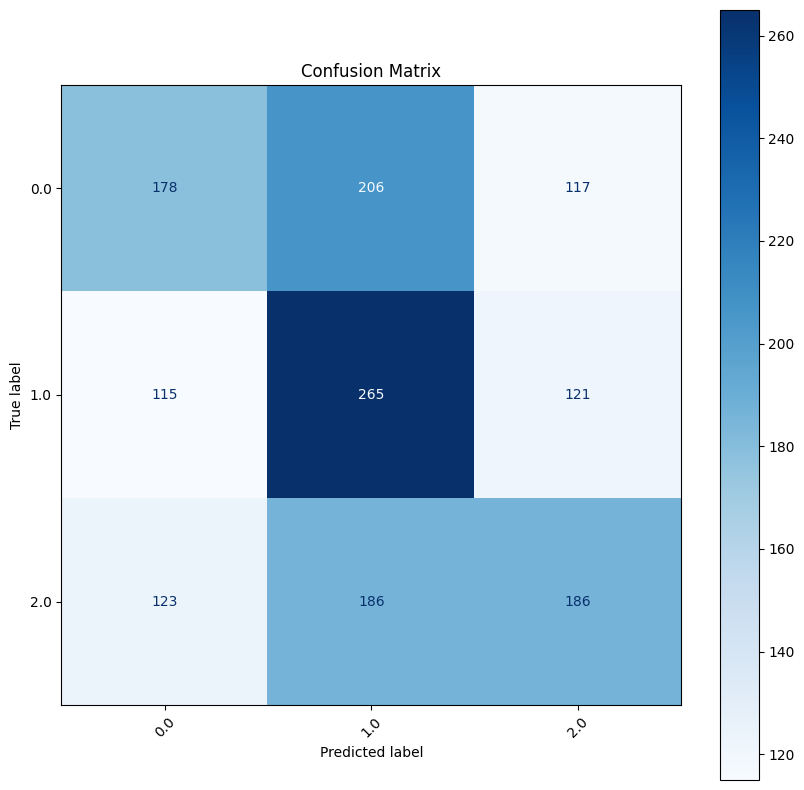

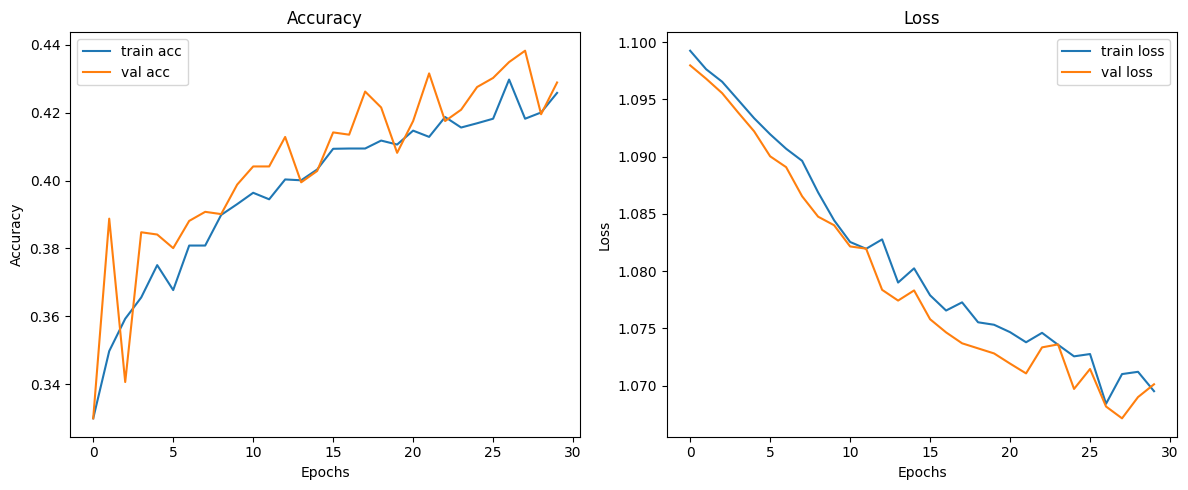


Test Accuracy: 0.4202
Test Loss: 1.0759

Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.36      0.39       501
         1.0       0.40      0.53      0.46       501
         2.0       0.44      0.38      0.40       495

    accuracy                           0.42      1497
   macro avg       0.42      0.42      0.42      1497
weighted avg       0.42      0.42      0.42      1497



In [47]:
# ------------------ Imports ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dropout, Dense

# ------------------ Load dataset ------------------
url = 'https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv'
df = pd.read_csv(url)

print(f"Initial dataset shape: {df.shape}")
print(f"Initial target value counts:\n{df['target'].value_counts()}")

# Check if 'target' column exists
if 'target' not in df.columns:
    print("Column 'target' not found! Available columns:")
    print(df.columns.tolist())
    # Try to find the correct target column name
    possible_target_cols = [col for col in df.columns if 'target' in col.lower() or 'label' in col.lower() or 'class' in col.lower()]
    if possible_target_cols:
        print(f"Possible target columns: {possible_target_cols}")
        # Use the first possible target column
        target_col = possible_target_cols[0]
        df = df.rename(columns={target_col: 'target'})
        print(f"Renamed '{target_col}' to 'target'")
    else:
        raise ValueError("Could not find target column in dataset")

# Drop NaN values
df = df.dropna()
print(f"After dropping NaN: {df.shape}")

# Check what values are actually in the target column
print(f"Unique target values: {df['target'].unique()}")

# Check if 'DrDoS_LDAP' exists (case-insensitive check)
drdos_ldap_mask = df['target'].astype(str).str.lower().str.contains('drdos_ldap')
if drdos_ldap_mask.any():
    print(f"Found {drdos_ldap_mask.sum()} 'DrDoS_LDAP' entries")
    df = df[~drdos_ldap_mask]
    print(f"After removing DrDoS_LDAP: {df.shape}")

# If dataset is empty, try without removing DrDoS_LDAP
if df.shape[0] == 0:
    print("Dataset empty after removing DrDoS_LDAP, reloading without this filter...")
    df = pd.read_csv(url)
    df = df.dropna()
    if 'target' not in df.columns and 'target_col' in locals():
        df = df.rename(columns={target_col: 'target'})

print(f"Final dataset shape before mapping: {df.shape}")
print(f"Final target value counts:\n{df['target'].value_counts()}")

# ------------------ Label mapping ------------------
# Create a mapping based on what actually exists in the dataset
unique_labels = sorted(df['target'].unique())  # Sort for consistent ordering
print(f"Unique labels to map: {unique_labels}")

# Create a mapping that includes all existing labels
label_map = {}
for i, label in enumerate(unique_labels):
    label_map[label] = i

print(f"Generated label mapping: {label_map}")
n_classes = len(unique_labels)
print(f"Number of classes: {n_classes}")

df['target'] = df['target'].map(label_map)

# Check if mapping worked correctly
print(f"Target values after mapping: {df['target'].unique()}")

X = df.drop(columns=['target']).values.astype('float32')
y = df['target'].values.astype('int32')

print(f"Final X shape: {X.shape}")
print(f"Final y shape: {y.shape}")

if X.shape[0] == 0:
    raise ValueError("No data available for training!")

# ------------------ Normalization ------------------
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)

# ------------------ Train/Val/Test split ------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train unique values: {np.unique(y_train)}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val unique values: {np.unique(y_val)}")

# One-hot labels
y_train_cat = to_categorical(y_train, num_classes=n_classes)
y_val_cat   = to_categorical(y_val, num_classes=n_classes)
y_test_cat  = to_categorical(y_test, num_classes=n_classes)

print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"y_val_cat shape: {y_val_cat.shape}")

# ------------------ Class weights ------------------
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i:w for i,w in enumerate(weights)}
print(f"Class weights: {class_weights}")

# ------------------ Reshape for Conv1D ------------------
X_train_conv = np.expand_dims(X_train, axis=-1)
X_val_conv   = np.expand_dims(X_val, axis=-1)
X_test_conv  = np.expand_dims(X_test, axis=-1)

print(f"X_train_conv shape: {X_train_conv.shape}")

# ------------------ Build model ------------------
model = Sequential([
    Input(shape=(X_train_conv.shape[1], 1)),
    Conv1D(64, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')  # This should match n_classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Verify model output shape matches target shape
sample_output = model.predict(X_train_conv[:1])
print(f"Model output shape for single sample: {sample_output.shape}")
print(f"Should match y_train_cat shape: {y_train_cat[:1].shape}")

# ------------------ Train model ------------------
history = model.fit(
    X_train_conv, y_train_cat,
    validation_data=(X_val_conv, y_val_cat),
    epochs=30, batch_size=256,
    class_weight=class_weights,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

# ------------------ Confusion Matrix ------------------
pred = model.predict(X_test_conv)
y_pred = pred.argmax(axis=1)

# Use the actual label names from your mapping
label_names = list(label_map.keys())

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation=45, cmap='Blues', colorbar=True)
plt.title('Confusion Matrix')
plt.show()

# ------------------ Training History Plots ------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss')
plt.tight_layout()
plt.show()

# ------------------ Evaluation ------------------
test_loss, test_acc = model.evaluate(X_test_conv, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ------------------ Class-wise performance ------------------
from sklearn.metrics import classification_report

print("\nClassification Report:")

# Convert label_names to strings to avoid the TypeError
label_names_str = [str(name) for name in label_names]

print(classification_report(y_test, y_pred, target_names=label_names_str))